<a href="https://colab.research.google.com/github/sfayhim/Projet_Safe_Driving/blob/main/carplates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 33.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()

Saving labels_my-project-name_2024-12-17-09-23-06.zip to labels_my-project-name_2024-12-17-09-23-06.zip


{'labels_my-project-name_2024-12-17-09-23-06.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00\xe3B\x91YN=\xa6\x83K\x00\x00\x00K\x00\x00\x00\n\x00\x00\x00photo1.txt0 0.389696 0.938345 0.190878 0.069257\n1 0.458953 0.525338 0.863176 0.942568PK\x03\x04\n\x00\x00\x00\x00\x00\xe3B\x91YQ\xff!~K\x00\x00\x00K\x00\x00\x00\x0b\x00\x00\x00photo10.txt0 0.449662 0.487331 0.263514 0.086149\n1 0.453041 0.355574 0.736486 0.711148PK\x03\x04\n\x00\x00\x00\x00\x00\xe3B\x91Yys\x8e3K\x00\x00\x00K\x00\x00\x00\x0c\x00\x00\x00photo100.txt0 0.621959 0.383446 0.135135 0.027027\n1 0.567061 0.372466 0.461149 0.265203PK\x03\x04\n\x00\x00\x00\x00\x00\xe3B\x91YWX\x7f\xfeK\x00\x00\x00K\x00\x00\x00\x0c\x00\x00\x00photo101.txt0 0.827196 0.360642 0.113176 0.032095\n1 0.643074 0.280405 0.606419 0.351351PK\x03\x04\n\x00\x00\x00\x00\x00\xe3B\x91Y\xca_\x14\x1eK\x00\x00\x00K\x00\x00\x00\x0c\x00\x00\x00photo102.txt0 0.527365 0.617399 0.533784 0.052365\n1 0.501858 0.342061 0.996284 0.626689PK\x03\x04\n\x00\x00\x00\x00\x00\xe3B\x91Yc\x

In [ ]:
!unzip labels_my-project-name_2024-12-17-09-23-06.zip -d labels/

Archive:  labels_my-project-name_2024-12-17-09-23-06.zip
 extracting: labels/photo1.txt       
 extracting: labels/photo10.txt      
 extracting: labels/photo100.txt     
 extracting: labels/photo101.txt     
 extracting: labels/photo102.txt     
 extracting: labels/photo103.txt     
 extracting: labels/photo104.txt     
 extracting: labels/photo105.txt     
 extracting: labels/photo106.txt     
 extracting: labels/photo107.txt     
 extracting: labels/photo108.txt     
 extracting: labels/photo109.txt     
 extracting: labels/photo11.txt      
 extracting: labels/photo110.txt     
 extracting: labels/photo111.txt     
 extracting: labels/photo112.txt     
 extracting: labels/photo113.txt     
 extracting: labels/photo114.txt     
 extracting: labels/photo115.txt     
 extracting: labels/photo116.txt     
 extracting: labels/photo117.txt     
 extracting: labels/photo118.txt     
 extracting: labels/photo119.txt     
 extracting: labels/photo12.txt      
 extracting: labels/photo120.tx

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths
images_path = "/content/images"  # Replace with the path to your images folder
labels_path = "/content/labels"  # Replace with the path to your labels folder
output_path = "/content/dataset"  # Folder where organized dataset will be saved

# Create directories for train, val, and test
os.makedirs(f"{output_path}/images/train", exist_ok=True)
os.makedirs(f"{output_path}/images/val", exist_ok=True)
os.makedirs(f"{output_path}/images/test", exist_ok=True)
os.makedirs(f"{output_path}/labels/train", exist_ok=True)
os.makedirs(f"{output_path}/labels/val", exist_ok=True)
os.makedirs(f"{output_path}/labels/test", exist_ok=True)

# Get all images and corresponding labels
images = sorted([f for f in os.listdir(images_path) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.webp'))])
labels = sorted([f for f in os.listdir(labels_path) if f.endswith(".txt")])

# Ensure image-label matching
assert len(images) == len(labels), "Number of images and labels must match!"
for img, lbl in zip(images, labels):
    assert img.split(".")[0] == lbl.split(".")[0], f"Mismatch: {img} and {lbl}"

# Split into train (70%), val (20%), and test (10%)
train_images, temp_images, train_labels, temp_labels = train_test_split(
    images, labels, test_size=0.3, random_state=42
)
val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.33, random_state=42  # 33% of 30% = ~10% of total
)

# Move files to their respective folders
def move_files(images_list, labels_list, image_dest, label_dest):
    for img, lbl in zip(images_list, labels_list):
        shutil.move(os.path.join(images_path, img), os.path.join(image_dest, img))
        shutil.move(os.path.join(labels_path, lbl), os.path.join(label_dest, lbl))

# Organize train, val, and test datasets
move_files(train_images, train_labels, f"{output_path}/images/train", f"{output_path}/labels/train")
move_files(val_images, val_labels, f"{output_path}/images/val", f"{output_path}/labels/val")
move_files(test_images, test_labels, f"{output_path}/images/test", f"{output_path}/labels/test")

print("Dataset organized successfully!")


Dataset organized successfully!


In [ ]:
data_yaml = """
train: /content/dataset/images/train
val: /content/dataset/images/val
nc: 2  # Number of classes (car, license plate)
names: ['car', 'license_plate']
"""
with open('data.yaml', 'w') as f:
    f.write(data_yaml)


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8s.pt')
model.train(data='/content/data.yaml', epochs=10, batch=16, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 166MB/s]


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/dataset/labels/train... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<00:00, 509.06it/s]

train: New cache created: /content/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/labels/val... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 1825.20it/s]

val: New cache created: /content/dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.367       3.73      1.603         28        640: 100%|██████████| 8/8 [05:39<00:00, 42.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:34<00:00, 17.49s/it]

                   all         36         72      0.673      0.653      0.697      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.9655      1.535      1.243         28        640: 100%|██████████| 8/8 [05:11<00:00, 38.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:31<00:00, 15.62s/it]

                   all         36         72      0.886      0.829      0.908       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.8604      1.121       1.17         28        640: 100%|██████████| 8/8 [05:16<00:00, 39.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:31<00:00, 15.58s/it]

                   all         36         72      0.897      0.833      0.902      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.8509      0.971      1.213         28        640: 100%|██████████| 8/8 [05:04<00:00, 38.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.59s/it]

                   all         36         72      0.799      0.914      0.917       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      0.854     0.8909      1.136         28        640: 100%|██████████| 8/8 [05:02<00:00, 37.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.79s/it]

                   all         36         72      0.814      0.919      0.912      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.8141     0.7715      1.109         28        640: 100%|██████████| 8/8 [05:04<00:00, 38.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:31<00:00, 15.90s/it]

                   all         36         72      0.872      0.865      0.941      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.7744     0.6964      1.119         28        640: 100%|██████████| 8/8 [05:05<00:00, 38.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:29<00:00, 14.70s/it]

                   all         36         72      0.942      0.861      0.937      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.7459     0.6388      1.102         28        640: 100%|██████████| 8/8 [05:07<00:00, 38.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:31<00:00, 15.55s/it]

                   all         36         72      0.905       0.85      0.918      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.7227     0.6099      1.081         28        640: 100%|██████████| 8/8 [05:06<00:00, 38.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:31<00:00, 15.66s/it]

                   all         36         72      0.878      0.958      0.971      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.7438     0.5939      1.115         28        640: 100%|██████████| 8/8 [05:05<00:00, 38.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:30<00:00, 15.01s/it]

                   all         36         72      0.924      0.943      0.978      0.752



10 epochs completed in 0.955 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:28<00:00, 14.40s/it]


                   all         36         72      0.923      0.944      0.978      0.751
         license_plate         36         36      0.914      0.888      0.962      0.696
                   car         36         36      0.933          1      0.995      0.807
Speed: 2.7ms preprocess, 788.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d32c42c9a80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
metrics = model.val(data='/content/data.yaml')


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/dataset/labels/val.cache... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:27<00:00,  9.06s/it]


                   all         36         72      0.923      0.944      0.978      0.751
         license_plate         36         36      0.914      0.888      0.962      0.696
                   car         36         36      0.933          1      0.995      0.807
Speed: 4.9ms preprocess, 734.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
results = model.predict(source='/content/dataset/images/test', save=True)


image 1/18 /content/dataset/images/test/photo100.jpg: 640x640 2 license_plates, 1 car, 1092.9ms
image 2/18 /content/dataset/images/test/photo107.jpg: 640x640 1 license_plate, 1 car, 763.3ms
image 3/18 /content/dataset/images/test/photo112.jpg: 640x640 1 license_plate, 2 cars, 625.7ms
image 4/18 /content/dataset/images/test/photo120.jpg: 640x640 1 license_plate, 1 car, 640.0ms
image 5/18 /content/dataset/images/test/photo15.jpg: 640x640 2 license_plates, 1 car, 621.5ms
image 6/18 /content/dataset/images/test/photo153.jpg: 640x640 1 license_plate, 1 car, 632.2ms
image 7/18 /content/dataset/images/test/photo158.jpg: 640x640 1 license_plate, 3 cars, 626.0ms
image 8/18 /content/dataset/images/test/photo159.jpg: 640x640 1 license_plate, 2 cars, 623.1ms
image 9/18 /content/dataset/images/test/photo161.jpg: 640x640 3 cars, 608.6ms
image 10/18 /content/dataset/images/test/photo17.jpg: 640x640 1 license_plate, 1 car, 623.3ms
image 11/18 /content/dataset/images/test/photo39.jpg: 640x640 1 licens

In [ ]:
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/best.pt


In [ ]:
!cp /content/drive/MyDrive/best.pt ./best.pt


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('best.pt')  # Replace 'best.pt' with your actual weights path

# Run inference on your test image
results = model.predict(source='/content/test2.jpg', save=True, conf=0.25)

# Get the directory where results are saved
print("Results saved to:", model.predictor.save_dir)



image 1/1 /content/test2.jpg: 640x640 1 license_plate, 1 car, 816.6ms
Speed: 13.9ms preprocess, 816.6ms inference, 39.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
Results saved to: runs/detect/predict



OCR
```
```



In [ ]:
!unzip labels_my-project-name_2024-12-17-09-23-06.zip -d labels/

Archive:  labels_my-project-name_2024-12-17-09-23-06.zip
 extracting: labels/photo1.txt       
 extracting: labels/photo10.txt      
 extracting: labels/photo100.txt     
 extracting: labels/photo101.txt     
 extracting: labels/photo102.txt     
 extracting: labels/photo103.txt     
 extracting: labels/photo104.txt     
 extracting: labels/photo105.txt     
 extracting: labels/photo106.txt     
 extracting: labels/photo107.txt     
 extracting: labels/photo108.txt     
 extracting: labels/photo109.txt     
 extracting: labels/photo11.txt      
 extracting: labels/photo110.txt     
 extracting: labels/photo111.txt     
 extracting: labels/photo112.txt     
 extracting: labels/photo113.txt     
 extracting: labels/photo114.txt     
 extracting: labels/photo115.txt     
 extracting: labels/photo116.txt     
 extracting: labels/photo117.txt     
 extracting: labels/photo118.txt     
 extracting: labels/photo119.txt     
 extracting: labels/photo12.txt      
 extracting: labels/photo120.tx

In [ ]:
import os
import cv2
import shutil

# Paths
images_path = "/content/images"  # Path to images
labels_path = "/content/labels"  # Path to labels
output_crops_path = "/content/cropped_plates"  # Path to save cropped plates

# Supported image formats
image_extensions = [".jpg", ".jpeg", ".webp", ".png"]

# Delete existing cropped plates folder and create a new one
if os.path.exists(output_crops_path):
    shutil.rmtree(output_crops_path)  # Delete the folder
os.makedirs(output_crops_path, exist_ok=True)  # Create a new one

# Process each label file
for label_file in os.listdir(labels_path):
    # Find the corresponding image file with any of the supported extensions
    image_name = os.path.splitext(label_file)[0]  # Get the base name (e.g., "photo123" from "photo123.txt")
    image_path = None
    for ext in image_extensions:
        potential_path = os.path.join(images_path, image_name + ext)
        if os.path.exists(potential_path):
            image_path = potential_path
            break

    # Skip if no matching image file is found
    if not image_path:
        print(f"No matching image found for label: {label_file}")
        continue

    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to read image: {image_path}")
        continue

    # Get image dimensions
    img_height, img_width, _ = img.shape

    # Read the label file
    label_path = os.path.join(labels_path, label_file)
    with open(label_path, "r") as file:
        lines = file.readlines()

    # Process each line in the label file
    for i, line in enumerate(lines):
        parts = line.strip().split()
        cls = int(parts[0])  # Class ID
        if cls != 0:  # Skip if not class 0
            continue

        # Extract bounding box information (normalized format: x_center, y_center, width, height)
        x_center, y_center, width, height = map(float, parts[1:])

        # Convert to pixel coordinates
        x1 = int((x_center - width / 2) * img_width)
        y1 = int((y_center - height / 2) * img_height)
        x2 = int((x_center + width / 2) * img_width)
        y2 = int((y_center + height / 2) * img_height)

        # Ensure bounding box coordinates are within image bounds
        x1 = max(0, x1)
        y1 = max(0, y1)
        x2 = min(img_width, x2)
        y2 = min(img_height, y2)

        # Crop the license plate region
        cropped_plate = img[y1:y2, x1:x2]

        # Save the cropped image
        output_filename = f"{os.path.splitext(image_name)[0]}_plate_{i+1}.jpg"
        output_path = os.path.join(output_crops_path, output_filename)
        cv2.imwrite(output_path, cropped_plate)
        print(f"Cropped plate saved: {output_filename}")


Cropped plate saved: photo68_plate_1.jpg
Cropped plate saved: photo136_plate_1.jpg
Cropped plate saved: photo113_plate_1.jpg
Cropped plate saved: photo120_plate_1.jpg
Cropped plate saved: photo100_plate_1.jpg
Cropped plate saved: photo41_plate_1.jpg
Cropped plate saved: photo115_plate_1.jpg
Cropped plate saved: photo58_plate_1.jpg
Cropped plate saved: photo49_plate_1.jpg
Cropped plate saved: photo175_plate_1.jpg
Cropped plate saved: photo5_plate_1.jpg
Cropped plate saved: photo47_plate_1.jpg
Cropped plate saved: photo107_plate_1.jpg
Cropped plate saved: photo130_plate_1.jpg
Cropped plate saved: photo131_plate_1.jpg
Cropped plate saved: photo40_plate_1.jpg
Cropped plate saved: photo72_plate_1.jpg
Cropped plate saved: photo34_plate_1.jpg
Cropped plate saved: photo99_plate_1.jpg
Cropped plate saved: photo29_plate_1.jpg
Cropped plate saved: photo59_plate_1.jpg
Cropped plate saved: photo67_plate_1.jpg
Cropped plate saved: photo108_plate_1.jpg
Cropped plate saved: photo165_plate_1.jpg
Croppe

OCR


In [ ]:
!pip install easyocr


In [ ]:
from google.colab import files
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


# Extract the ZIP file
zip_path = "/content/plaques.zip"  # Ensure this matches the uploaded file name
extract_to = "/content/plaques"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to {extract_to}")


# Base directory (set after extraction)
base_dir = "/content/plaques/plaques"
folders = ["nounta", "ideria", "others"]  # Folders to augment
target_count = 155  # Target number of images per folder

# Data Augmentation Generator
datagen = ImageDataGenerator(
    rotation_range=30,       # Random rotations
    width_shift_range=0.2,   # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,         # Shearing
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flip
    fill_mode='nearest'      # Fill in missing pixels
)

# Augment images in each folder
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    images = os.listdir(folder_path)
    current_count = len(images)
    print(f"Augmenting '{folder}' with {current_count} images...")

    # Stop if the folder already has the target count
    if current_count >= target_count:
        print(f"'{folder}' already has {current_count} images.")
        continue

    # Loop to generate augmented images
    for i in range(target_count - current_count):
        # Pick a random image
        img_name = images[i % current_count]  # Loop through images cyclically
        img_path = os.path.join(folder_path, img_name)

        # Load and preprocess the image
        img = load_img(img_path)  # Load the image
        img_array = img_to_array(img)  # Convert to array
        img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for generator

        # Generate an augmented image
        for batch in datagen.flow(img_array, batch_size=1):
            # Save the augmented image
            new_img_name = f"aug_{i}_{img_name}"  # Unique name for the new image
            new_img_path = os.path.join(folder_path, new_img_name)
            array_to_img(batch[0]).save(new_img_path)
            break  # Generate one image per iteration

    print(f"'{folder}' now has {len(os.listdir(folder_path))} images.")

print("Data augmentation complete!")
!zip -r augmented_plaques.zip /content/plaques
from google.colab import files
files.download("augmented_plaques.zip")


Files extracted to /content/plaques
Augmenting 'nounta' with 21 images...
'nounta' now has 155 images.
Augmenting 'ideria' with 16 images...
'ideria' now has 155 images.
Augmenting 'others' with 6 images...
'others' now has 155 images.
Data augmentation complete!
  adding: content/plaques/ (stored 0%)
  adding: content/plaques/plaques/ (stored 0%)
  adding: content/plaques/plaques/tounsia/ (stored 0%)
  adding: content/plaques/plaques/tounsia/plaque_tounsia_143.jpg (deflated 3%)
  adding: content/plaques/plaques/tounsia/plaque_tounsia_106.jpg (deflated 1%)
  adding: content/plaques/plaques/tounsia/plaque_tounsia_42.jpg (deflated 3%)
  adding: content/plaques/plaques/tounsia/plaque_tounsia_140.jpg (deflated 4%)
  adding: content/plaques/plaques/tounsia/plaque_tounsia_30.jpg (deflated 3%)
  adding: content/plaques/plaques/tounsia/plaque_tounsia_72.jpg (deflated 4%)
  adding: content/plaques/plaques/tounsia/plaque_tounsia_111.jpg (deflated 3%)
  adding: content/plaques/plaques/tounsia/pla

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
# Paths
base_dir = "/content/plaques/plaques"

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    validation_split=0.2  # 20% for validation
)

# Training Data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,          # Number of images per batch
    class_mode='categorical',  # Multi-class classification
    subset='training'       # Use the training subset
)

# Validation Data
val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)


Found 496 images belonging to 4 classes.
Found 124 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps
    Flatten(),

    # Fully connected layers with L2 regularization
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Add Dropout to reduce overfitting

    # Output layer for classification
    Dense(4, activation='softmax')  # 4 classes: ideria, nounta, others, tounsia
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,716 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',  # Adaptive learning rate
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=15,  # Number of epochs
    validation_data=val_generator,
    callbacks=[early_stop]
)




Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.2972 - loss: 8.7612 - val_accuracy: 0.5565 - val_loss: 3.2280
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.6107 - loss: 2.8354 - val_accuracy: 0.6774 - val_loss: 1.8973
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.7303 - loss: 1.7156 - val_accuracy: 0.6613 - val_loss: 1.4372
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.7796 - loss: 1.2067 - val_accuracy: 0.6452 - val_loss: 1.3320
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7739 - loss: 1.0546 - val_accuracy: 0.7258 - val_loss: 1.1921
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8176 - loss: 0.9664 - val_accuracy: 0.7339 - val_loss: 1.2192
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8493 - loss: 1.0061 - val_accuracy: 0.6613 - val_loss: 1.2664
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.8635 - loss: 0.9049 - val_accuracy: 0.7097 - val_loss: 1.1933
Epo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
import os

# Path to the zip file in Google Drive
zip_path = '/content/drive/MyDrive/YOLO_DATA/car_plaques_cnn_model.zip'  # Update the path if needed
extract_path = '/content/car_plaques_cnn_model'  # Destination folder to extract the model

# Unzipping the model
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Model unzipped successfully!")
from tensorflow.keras.models import load_model

model = load_model('/content/car_plaques_cnn_model')

print("Model loaded successfully!")



In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - accuracy: 0.7039 - loss: 1.1873
Validation Loss: 1.1921322345733643
Validation Accuracy: 0.725806474685669


In [ ]:
model.save("car_plaques_cnn_model.h5")
from google.colab import files
files.download("car_plaques_cnn_model.h5")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Get true labels and predicted labels
val_generator.reset()  # Reset the validation generator

# Predict the probabilities for all validation images
predictions = model.predict(val_generator)

# Convert predicted probabilities to class indices
y_pred = np.argmax(predictions, axis=1)

# Get true labels
y_true = val_generator.classes

# Get class names
class_names = list(val_generator.class_indices.keys())


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 444ms/step


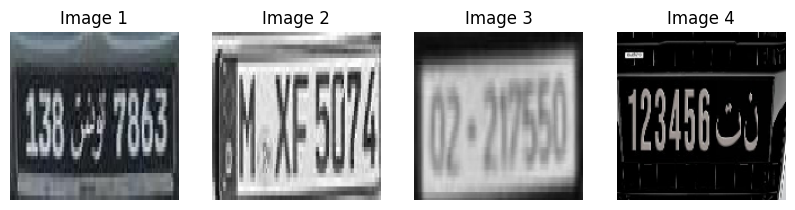

In [ ]:
# Image paths (replace with your actual file paths)
image_paths = ["/content/tunis.jpg","/content/2.jpg","/content/3.jpg","/content/5.jpg"]

# Preprocessing and visualization
img_size = (150, 150)

images = []

plt.figure(figsize=(10, 5))
for i, img_path in enumerate(image_paths):
    # Load and preprocess the image
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    images.append(img_array)

    # Plot the image
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")

plt.show()

# Convert to numpy array
images = np.array(images)


In [ ]:
# Predict class probabilities
predictions = model.predict(images)

# Get the class indices with the highest probabilities
predicted_classes = np.argmax(predictions, axis=1)

# Class names (update with your actual class labels)
class_names = ['ideria', 'nounta', 'others', 'tounsia']

# Print predictions
for i, pred in enumerate(predicted_classes):
    print(f"Image {i+1} is predicted as: {class_names[pred]} (Class {pred})")


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:3789: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


In [ ]:
!pip install arabic_reshaper
!pip install python-bidi


In [ ]:
rm -rf ~/.EasyOCR/model


In [ ]:
!pip install --upgrade easyocr


Detected Text: 7863 تونن 138 (Confidence: 0.51)


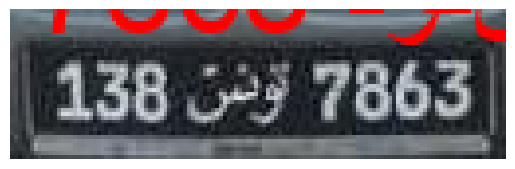

In [ ]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import ImageFont, ImageDraw, Image

# Initialize EasyOCR reader with Arabic support
reader = easyocr.Reader(['ar', 'en'], download_enabled=True)


# Function to process images and detect text using EasyOCR
def process_image(image_path, class_label):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Run EasyOCR to detect text
    results = reader.readtext(image_rgb)

    # Define replacements based on class label
    replacements = {
        "nounta": "ن ت",  # For nounta class
        "tounsia": "تونس",  # For tounsia class
    }

    # Create a copy of the original image for displaying results
    image_copy = image_rgb.copy()

    # Load font for rendering Arabic text (Ensure the font supports Arabic)
    fontpath = "/content/arial.ttf"  # Replace with your actual font path
    font = ImageFont.truetype(fontpath, 32)

    # Loop over OCR results and display updated text
    for (bbox, text, prob) in results:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # Replace '?' text manually based on the class label
        if "?" in text:
            print(f"Detected text with '?????': {text}")  # Print out detected text for debugging
            text = replacements.get(class_label, text)
            print(f"Replaced text: {text}")  # Print the replaced text for debugging

        # Reshape and bidi text for Arabic
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)

        # Create a PIL image from the OpenCV image for text rendering
        img_pil = Image.fromarray(image_copy)
        draw = ImageDraw.Draw(img_pil)

        # Draw the bounding box (on the OpenCV image, which is later converted to PIL)
        cv2.rectangle(image_copy, top_left, bottom_right, (0, 255, 0), 2)

        # Get the bounding box of the text using textbbox (instead of textsize)
        text_bbox = draw.textbbox((top_left[0], top_left[1]), bidi_text, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

        # Adjust text position so it fits within the image and is inside the bounding box
        text_x = top_left[0]
        text_y = top_left[1] - text_height - 5  # Position the text above the box

        # Draw the corrected Arabic text on the image
        draw.text((text_x, text_y), bidi_text, font=font, fill=(255, 0, 0))  # Red text for visibility

        print(f"Detected Text: {text} (Confidence: {prob:.2f})")

    # Convert the PIL image back to OpenCV format
    img = np.array(img_pil)

    # Show the updated image with the replaced text
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Example Usage
image_path = '/content/tunis.jpg'  # Replace with your image path
class_label = 'nounta'  # Replace with actual class label ('nounta' or 'tounsia')

# Process the image with the given class label
process_image(image_path, class_label)


vd


In [ ]:
!pip install ultralytics opencv-python-headless easyocr


In [ ]:
!pip install ultralytics easyocr arabic-reshaper python-bidi pillow


In [ ]:
from ultralytics import YOLO
import cv2
import easyocr
import numpy as np
from PIL import Image, ImageFont, ImageDraw
import arabic_reshaper
from bidi.algorithm import get_display

# Initialize EasyOCR reader with Arabic and English support
reader = easyocr.Reader(['ar', 'en'])

# Load the trained YOLO model
model = YOLO('best.pt')  # Replace with the path to your YOLO model weights

# Path to input and output video
input_video_path = '/content/VID20241217133043.mp4'  # Replace with your input video path
output_video_path = 'result_vd.mp4'  # Replace with your desired output video path

# Load font for rendering Arabic text (ensure the font supports Arabic)
font_path = "/content/arial.ttf"  # Replace with the actual path to your Arabic-supported font
font = ImageFont.truetype(font_path, 32)

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Process the video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection on the frame
    results = model(frame, conf=0.25)

    # Convert the OpenCV frame to PIL format for rendering
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img_pil)  # Initialize the draw object

    # Loop through detections and process each bounding box
    for result in results[0].boxes.data:
        x1, y1, x2, y2, conf, cls = result.tolist()
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])  # Convert to integer coordinates

        # Crop the detected region
        cropped_region = frame[y1:y2, x1:x2]

        # Apply EasyOCR to the cropped region
        ocr_result = reader.readtext(cropped_region)
        text = ""
        if ocr_result:
            text = ocr_result[0][-2]  # Extract the detected text

            # Reshape and adjust Arabic text
            reshaped_text = arabic_reshaper.reshape(text)
            bidi_text = get_display(reshaped_text)
        else:
            bidi_text = f"Class: {int(cls)}"  # Display class ID if no text is detected

        # Draw the bounding box on the frame
        draw.rectangle([(x1, y1), (x2, y2)], outline="blue", width=2)

        # Calculate text position
        text_x = x1
        text_y = y1 - 35 if y1 > 35 else y2 + 5

        # Draw text on the frame
        draw.text((text_x, text_y), bidi_text, font=font, fill=(255, 0, 0))  # Red text

    # Convert back to OpenCV format
    frame = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

    # Write the processed frame to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()

print(f"Processed video saved at: {output_video_path}")



0: 640x384 1 car, 407.3ms
Speed: 3.4ms preprocess, 407.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 439.0ms
Speed: 6.6ms preprocess, 439.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 384.0ms
Speed: 4.7ms preprocess, 384.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 1800.0ms
Speed: 12.0ms preprocess, 1800.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 418.0ms
Speed: 4.8ms preprocess, 418.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 559.6ms
Speed: 4.6ms preprocess, 559.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 609.0ms
Speed: 9.4ms preprocess, 609.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 car, 609.6ms
Speed: 6.7ms preprocess, 609.6ms inference, 1.4ms postprocess per

KeyboardInterrupt: 